In [3]:
!pip install surprise==0.1

In [4]:
import pandas as pd
import matplotlib
#Import Surprise Library Filtering Methods
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF,SVDpp
from surprise.model_selection import cross_validate, KFold
print('Imports successful!')

Imports successful!


In [5]:
%matplotlib inline

In [6]:
df=pd.read_csv('unbalanced_reviews.tsv', sep='\t')
col_names=df.columns=['Rating','review_id','book_id','user_id','review']
#dropping reviews column
df.drop(['review_id', 'review'], axis=1, inplace=True)
df.head()


,Rating,book_id,user_id
0,5,56693085,13637412
1,4,30836455,13637412
2,5,6680940,13637412
3,3,19011044,13637412
4,4,54035328,13637412


Histogram generation successful!


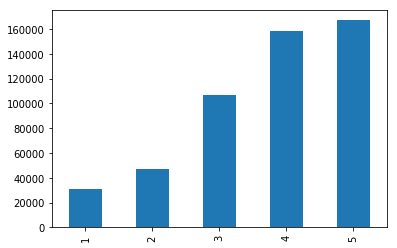

In [7]:
# Get the rating column
ratingsPlot=df.Rating

# Generate a histogram of that data
ratingsPlot.value_counts().sort_index().plot.bar()

print('Histogram generation successful!')

In [8]:
df.describe()

,Rating,book_id,user_id
count,510598.000000,5.105980e+05,5.105980e+05
mean,3.749666,1.634667e+07,1.154575e+07
std,1.180464,1.195889e+07,6.529257e+06
min,1.000000,8.324000e+03,7.600000e+02
25%,3.000000,6.532272e+06,6.380842e+06
50%,4.000000,1.332966e+07,1.045221e+07
75%,5.000000,2.325831e+07,1.610216e+07
max,5.000000,5.724964e+07,3.024053e+07


In [9]:
#define a Reader object for Surprise to be able to parse the file or the dataframe
from surprise import Reader
min_book_ratings = 50
filter_books = df['book_id'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()
min_user_ratings = 50
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()
df_new = df[(df['book_id'].isin(filter_books)) & (df['user_id'].isin(filter_users))]
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_new[['user_id', 'book_id', 'Rating']], reader)

In [10]:
#create user-based model
model_user = KNNBasic(sim_options={'user_based': True})
print('Model creation successful!')

Model creation successful!


In [20]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE & MAE
model_user_results = cross_validate(model_user, data, measures=['RMSE','MAE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0576  1.0645  1.0618  1.0582  1.0467  1.0578  0.0061  
MAE (testset)     0.8474  0.8522  0.8482  0.8460  0.8377  0.8463  0.0048  
Fit time          0.77    0.78    0.90    1.17    0.98    0.92    0.15    
Test time         4.11    3.57    5.96    4.84    4.85    4.67    0.81    
Model training successful!


In [11]:
#create item-based model
model_item = KNNBasic(sim_options={'user_based': False})
print('Model creation successful!')

Model creation successful!


In [22]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE & MAE
model_item_results = cross_validate(model_item, data, measures=['RMSE','MAE'], cv=5, verbose=True)
print('Model training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0295  1.0356  1.0268  1.0346  1.0311  1.0315  0.0033  
MAE (testset)     0.8254  0.8298  0.8228  0.8296  0.8223  0.8260  0.0032  
Fit time          0.77    1.11    1.21    0.84    0.87    0.96    0.17    
Test time         5.79    5.69    5.21    5.06    4.25    5.20    0.55    
Model training successful!


In [12]:
#Matrix Factorization model
model_matrix = SVD()
print('Model creation successful!')

Model creation successful!


In [24]:
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE','MAE','FCP'], cv=5, verbose=True)
print('Model training successful!')

Evaluating RMSE, MAE, FCP of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9920  0.9970  0.9868  0.9952  0.9928  0.9928  0.0034  
MAE (testset)     0.7913  0.7962  0.7844  0.7919  0.7898  0.7907  0.0038  
FCP (testset)     0.6253  0.6152  0.6200  0.6238  0.6232  0.6215  0.0036  
Fit time          15.43   12.48   9.56    9.78    9.53    11.36   2.32    
Test time         1.00    0.59    0.23    0.23    0.37    0.49    0.29    
Model training successful!


In [13]:
#Matrix Factorization++ model
model_svdpp= SVDpp()
print('Model creation successful!')

Model creation successful!


In [26]:
#takes around 15-20 minutes to do the cross validation
model_matrix_results = cross_validate(model_svdpp, data, measures=['RMSE','MAE','FCP'], cv=5, verbose=True)
print('Model training successful!')

Evaluating RMSE, MAE, FCP of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9852  0.9809  0.9810  0.9786  0.9844  0.9820  0.0024  
MAE (testset)     0.7810  0.7764  0.7782  0.7775  0.7826  0.7792  0.0023  
FCP (testset)     0.6307  0.6267  0.6381  0.6319  0.6363  0.6327  0.0041  
Fit time          188.14  186.60  190.44  187.80  182.75  187.15  2.53    
Test time         3.29    6.67    3.33    3.21    3.13    3.92    1.37    
Model training successful!


In [14]:
#function was adapted from here https://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('Function creation successful!')

Function creation successful!


In [30]:
# Make list of k values
Kvalues = [1,5, 10]
# Make list of models (without SVD++)
models = [model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in Kvalues:
    for model in models:
        #first knn basics model is user-based the second is item-based
        print(f'>>> k={k}, model={model.__class__.__name__}')
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)
            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('precision:', round(sum(p) / len(p), 3))
        print('recall  :', round(sum(r) / len(r), 3))
        print('\n')

print('Precision and recall Computation successful!')

>>> k=1, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
precision: 0.746
recall  : 0.275


>>> k=1, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
precision: 0.816
recall  : 0.204


>>> k=1, model=SVD
precision: 0.816
recall  : 0.249


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
C

In [27]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Function creation successful!')

Function creation successful!


In [28]:
#Trainset and testset creation
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
print('Trainset and testset creation successful!')

Trainset and testset creation successful!


In [30]:
#computing the top N predictions with MSD similarity
models = [model_item, model_user, model_matrix,model_svdpp]

for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model}, {user}: {top_n[user]}')

print('Top N computation successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x0000025489C6D828>, 13637412: [(4247385, 4.7460854845535332), (13594446, 4.6504627982754432), (1550186, 4.6500000000000004), (14640891, 4.6440117293146521), (4247926, 4.6435578674319737)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x00000254893D2E80>, 13637412: [(15484846, 5.0), (19122124, 4.9020402107715411), (18799895, 4.8954168032212433), (20099827, 4.8886558995252711), (45582299, 4.794949257136973)]
model: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x0000025489C6D8D0>, 13637412: [(28812837, 5.8462260749527886), (25081877, 5.6093176652092565), (19122124, 5.5591195939087941), (15484846, 5.5236440880344597), (18799895, 5.5212214031829561)]
model: <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x00000254A99A10B8>, 